First step_reading the data set 

# Importing libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Reading dataset

In [14]:
data = pd.read_csv('/SeoulBikeData.csv')
data.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [15]:
data.shape

(8760, 14)

In [16]:
data.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


# checking missing values

In [17]:
missing_value = data.isna().sum()
missing_value

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

# checking correlation

In [18]:
corre_data = data.corr()
corre_data

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


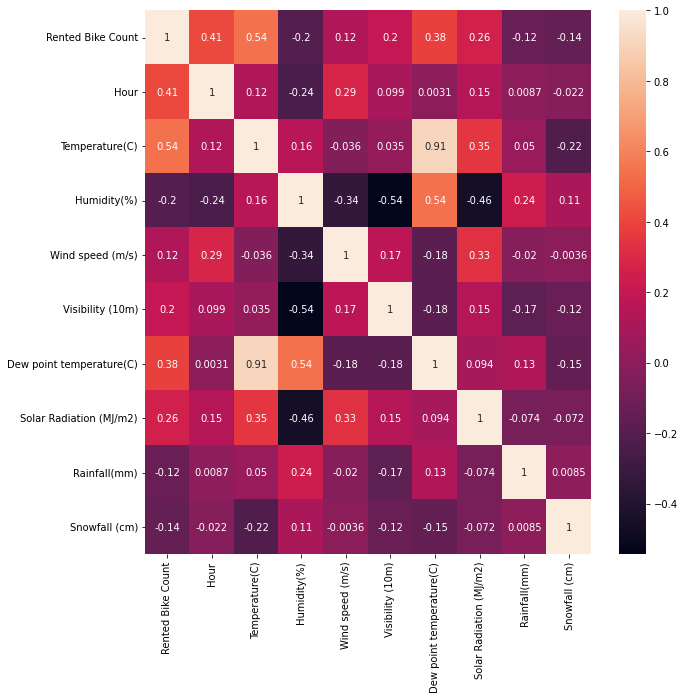

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(corre_data,annot=True)


detecting and removoing outliers

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


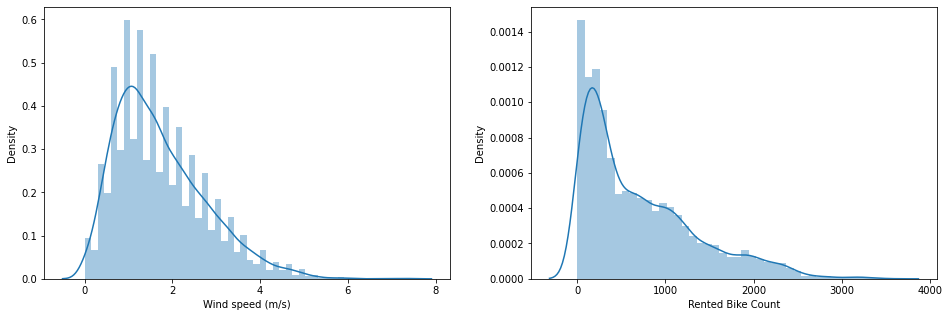

In [20]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(data['Wind speed (m/s)'])
plt.subplot(1,2,2)
sns.distplot(data['Rented Bike Count'])
plt.show()


In [21]:
percentile25 = data['Wind speed (m/s)'].quantile(0.25)
percentile75 = data['Wind speed (m/s)'].quantile(0.75)
iqr=percentile75-percentile25
print(iqr)


1.4


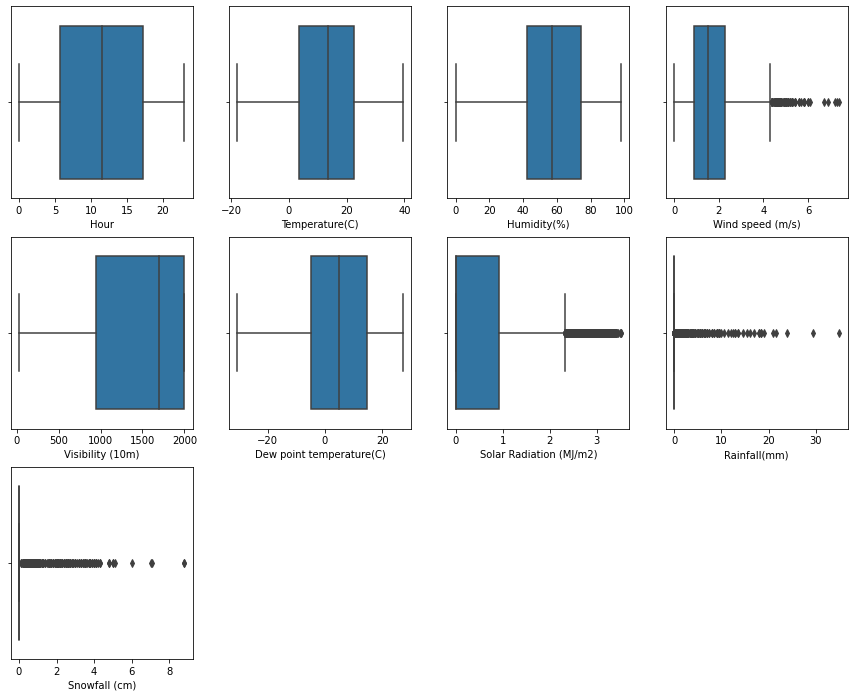

In [22]:
plt.figure(figsize=(15,12))
plt.subplot(3,4,1)
sns.boxplot(x=data['Hour'])
plt.subplot(3,4,2)
sns.boxplot(x=data['Temperature(C)'])
plt.subplot(3,4,3)
sns.boxplot(x=data['Humidity(%)'])
plt.subplot(3,4,4)
sns.boxplot(x=data['Wind speed (m/s)'])
plt.subplot(3,4,5)
sns.boxplot(x=data['Visibility (10m)'])
plt.subplot(3,4,6)
sns.boxplot(x=data['Dew point temperature(C)'])
plt.subplot(3,4,7)
sns.boxplot(x=data['Solar Radiation (MJ/m2)'])
plt.subplot(3,4,8)
sns.boxplot(x=data['Rainfall(mm)'])
plt.subplot(3,4,9)
sns.boxplot(x=data['Snowfall (cm)'])


In [23]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
data[data['Wind speed (m/s)'] > upper_limit]
data[data['Wind speed (m/s)'] < lower_limit]


,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day


In [24]:
df = data[data['Wind speed (m/s)']> upper_limit]
df


,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
82,04/12/2017,311,10,-1.1,40,4.5,2000,-13.0,0.64,0.0,0.0,Winter,No Holiday,Yes
84,04/12/2017,393,12,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,Winter,No Holiday,Yes
85,04/12/2017,391,13,0.0,30,5.4,1938,-15.5,1.17,0.0,0.0,Winter,No Holiday,Yes
86,04/12/2017,338,14,0.1,27,4.5,2000,-16.7,1.09,0.0,0.0,Winter,No Holiday,Yes
87,04/12/2017,341,15,-0.1,25,5.8,2000,-17.8,0.88,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7934,27/10/2018,1183,14,10.8,37,4.4,2000,-3.3,1.29,0.0,0.0,Autumn,No Holiday,Yes
7937,27/10/2018,1176,17,9.5,34,5.7,2000,-5.6,0.45,0.0,0.0,Autumn,No Holiday,Yes
7985,29/10/2018,1274,17,10.0,43,4.9,2000,-2.0,0.43,0.0,0.0,Autumn,No Holiday,Yes
8242,09/11/2018,0,10,11.3,68,4.7,1984,5.5,0.44,0.0,0.0,Autumn,No Holiday,No


# Label Encoding (changing categorical values into numerical values)

In [25]:
df.Seasons.unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [26]:
df['Functioning Day']=df['Functioning Day'].apply(lambda x : 1 if (x =='Yes') else(0))
df['Holiday']=df['Holiday'].apply(lambda x : 1 if (x =='Holiday') else(0))
df['Seasons']=df['Seasons'].replace(['Autumn'],1)
df['Seasons']=df['Seasons'].replace(['Summer'],2)
df['Seasons']=df['Seasons'].replace(['Spring'],3)#df['season']=df['season'].replace(['summer'],3)
df['Seasons']=df['Seasons'].replace(['Winter'],4)
df


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
82,04/12/2017,311,10,-1.1,40,4.5,2000,-13.0,0.64,0.0,0.0,4,0,1
84,04/12/2017,393,12,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,4,0,1
85,04/12/2017,391,13,0.0,30,5.4,1938,-15.5,1.17,0.0,0.0,4,0,1
86,04/12/2017,338,14,0.1,27,4.5,2000,-16.7,1.09,0.0,0.0,4,0,1
87,04/12/2017,341,15,-0.1,25,5.8,2000,-17.8,0.88,0.0,0.0,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7934,27/10/2018,1183,14,10.8,37,4.4,2000,-3.3,1.29,0.0,0.0,1,0,1
7937,27/10/2018,1176,17,9.5,34,5.7,2000,-5.6,0.45,0.0,0.0,1,0,1
7985,29/10/2018,1274,17,10.0,43,4.9,2000,-2.0,0.43,0.0,0.0,1,0,1
8242,09/11/2018,0,10,11.3,68,4.7,1984,5.5,0.44,0.0,0.0,1,0,0


# Model Preparation

In [27]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso


In [28]:
import seaborn as sns

# dividng and splitting data

In [32]:
reporting={}
X_LinearRegression=df.drop(['Rented Bike Count','Date'],axis =1)
y=df.iloc[:,1]
X_train,X_test,y_train,y_test=train_test_split(X_LinearRegression,y,test_size=0.27)


In [33]:
regr = linear_model.LinearRegression()
fitregr=regr.fit(X_train, y_train)
predregrtrain=fitregr.predict(X_train)
predregrtest=fitregr.predict(X_test)


# Checking accuracy

In [34]:
train_set_r2 = r2_score(y_train, predregrtrain)
print('Linear model, R2 train score is : {}'.format(train_set_r2))
test_set_r2 = r2_score(y_test, predregrtest)
print('Linear model, R2 test score is : {}'.format(test_set_r2))


Linear model, R2 train score is : 0.6405685964780525
Linear model, R2 test score is : 0.785672050407891
